In [1]:
# Required Libraries.
import time
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV


In [5]:
#Loading data
suicide_rates = pd.read_csv('C:/Users/B_S_OkoliPC/Downloads/spec-files - Copy/spec-files - Copy/suicide_rates_1990-2022.csv')
age_std_suicide_rates = pd.read_csv('C:/Users/B_S_OkoliPC/Downloads/spec-files - Copy/spec-files - Copy/age_std_suicide_rates_1990-2022.csv')
 
# Display the first few rows of each dataset to understand their structure
print(age_std_suicide_rates.head())


  RegionCode RegionName CountryCode CountryName  Year     Sex  SuicideCount  \
0         EU     Europe         ALB     Albania  1992    Male            33   
1         EU     Europe         ALB     Albania  1992  Female            14   
2         EU     Europe         ALB     Albania  1993    Male            46   
3         EU     Europe         ALB     Albania  1993  Female            27   
4         EU     Europe         ALB     Albania  1994    Male            37   

   CauseSpecificDeathPercentage  StdDeathRate  DeathRatePer100K  Population  \
0                      0.331959      2.335802          2.076386   3247039.0   
1                      0.191860      0.866420          0.874563   3247039.0   
2                      0.477724      3.330938          2.937233   3227287.0   
3                      0.385164      1.755077          1.686025   3227287.0   
4                      0.419406      2.678796          2.332619   3207536.0   

            GDP  GDPPerCapita           GNI  GNIPe

In [6]:
print(suicide_rates.head())

  RegionCode RegionName CountryCode CountryName  Year   Sex     AgeGroup  \
0         EU     Europe         ALB     Albania  1992  Male   0-14 years   
1         EU     Europe         ALB     Albania  1992  Male   0-14 years   
2         EU     Europe         ALB     Albania  1992  Male   0-14 years   
3         EU     Europe         ALB     Albania  1992  Male   0-14 years   
4         EU     Europe         ALB     Albania  1992  Male  15-24 years   

         Generation  SuicideCount  CauseSpecificDeathPercentage  \
0  Generation Alpha           0.0                      0.000000   
1  Generation Alpha           0.0                      0.000000   
2  Generation Alpha           0.0                      0.000000   
3  Generation Alpha           0.0                      0.000000   
4      Generation Z           5.0                      3.401361   

   DeathRatePer100K  Population          GDP  GDPPerCapita  \
0          0.000000   3247039.0  652174990.8     200.85222   
1          0.000

In [7]:
# Check for missing values
print(age_std_suicide_rates.isnull().sum())
print(suicide_rates.isnull().sum())

RegionCode                        0
RegionName                        0
CountryCode                       0
CountryName                       0
Year                              0
Sex                               0
SuicideCount                      0
CauseSpecificDeathPercentage      1
StdDeathRate                    208
DeathRatePer100K                208
Population                      296
GDP                             362
GDPPerCapita                    362
GNI                             498
GNIPerCapita                    538
InflationRate                   723
EmploymentPopulationRatio       556
dtype: int64
RegionCode                          0
RegionName                          0
CountryCode                         0
CountryName                         0
Year                                0
Sex                                 0
AgeGroup                            0
Generation                          0
SuicideCount                      464
CauseSpecificDeathPercentage     

In [8]:
#Filling missing values in GDP columns with mean or median
age_std_suicide_rates['GDP'] = age_std_suicide_rates['GDP'].fillna(age_std_suicide_rates['GDP'].mean())
age_std_suicide_rates['GDPPerCapita'] = age_std_suicide_rates['GDPPerCapita'].fillna(age_std_suicide_rates['GDPPerCapita'].mean())

suicide_rates['GDP'] = suicide_rates['GDP'].fillna(suicide_rates['GDP'].mean())
suicide_rates['GDPPerCapita'] = suicide_rates['GDPPerCapita'].fillna(suicide_rates['GDPPerCapita'].mean())

# Check the result after filling
print(age_std_suicide_rates.isnull().sum())
print(suicide_rates.isnull().sum())

RegionCode                        0
RegionName                        0
CountryCode                       0
CountryName                       0
Year                              0
Sex                               0
SuicideCount                      0
CauseSpecificDeathPercentage      1
StdDeathRate                    208
DeathRatePer100K                208
Population                      296
GDP                               0
GDPPerCapita                      0
GNI                             498
GNIPerCapita                    538
InflationRate                   723
EmploymentPopulationRatio       556
dtype: int64
RegionCode                          0
RegionName                          0
CountryCode                         0
CountryName                         0
Year                                0
Sex                                 0
AgeGroup                            0
Generation                          0
SuicideCount                      464
CauseSpecificDeathPercentage     

In [9]:
# Handling missing values in age_std_suicide_rates
age_std_suicide_rates.fillna(method='ffill', inplace=True)  # Forward fill as a general method
age_std_suicide_rates.fillna(method='bfill', inplace=True)  # Backward fill to handle any remaining

# Handling missing values in suicide_rates
suicide_rates.fillna(method='ffill', inplace=True)  # Forward fill as a general method
suicide_rates.fillna(method='bfill', inplace=True)  # Backward fill to handle any remaining

# Check the result after filling
print(age_std_suicide_rates.isnull().sum())
print(suicide_rates.isnull().sum())

RegionCode                      0
RegionName                      0
CountryCode                     0
CountryName                     0
Year                            0
Sex                             0
SuicideCount                    0
CauseSpecificDeathPercentage    0
StdDeathRate                    0
DeathRatePer100K                0
Population                      0
GDP                             0
GDPPerCapita                    0
GNI                             0
GNIPerCapita                    0
InflationRate                   0
EmploymentPopulationRatio       0
dtype: int64
RegionCode                      0
RegionName                      0
CountryCode                     0
CountryName                     0
Year                            0
Sex                             0
AgeGroup                        0
Generation                      0
SuicideCount                    0
CauseSpecificDeathPercentage    0
DeathRatePer100K                0
Population                      0
G

In [11]:
# Ensure correct data types
age_std_suicide_rates['Year'] = age_std_suicide_rates['Year'].astype(int)
suicide_rates['Year'] = suicide_rates['Year'].astype(int)

In [13]:
#Exploratory Data Analysis
age_std_suicide_rates.columns

Index(['RegionCode', 'RegionName', 'CountryCode', 'CountryName', 'Year', 'Sex',
       'SuicideCount', 'CauseSpecificDeathPercentage', 'StdDeathRate',
       'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita', 'GNI',
       'GNIPerCapita', 'InflationRate', 'EmploymentPopulationRatio'],
      dtype='object')

In [14]:
suicide_rates.columns

Index(['RegionCode', 'RegionName', 'CountryCode', 'CountryName', 'Year', 'Sex',
       'AgeGroup', 'Generation', 'SuicideCount',
       'CauseSpecificDeathPercentage', 'DeathRatePer100K', 'Population', 'GDP',
       'GDPPerCapita', 'GrossNationalIncome', 'GNIPerCapita', 'InflationRate',
       'EmploymentPopulationRatio'],
      dtype='object')

In [15]:
print(age_std_suicide_rates.describe())

              Year  SuicideCount  CauseSpecificDeathPercentage  StdDeathRate  \
count  5928.000000   5928.000000                   5928.000000   5928.000000   
mean   2005.740047   1267.660088                      1.264062      9.357946   
std       8.745704   3887.349179                      1.188689     10.644286   
min    1990.000000      0.000000                      0.000000      0.000000   
25%    1999.000000     30.000000                      0.430815      2.278397   
50%    2006.000000    226.500000                      0.882149      5.754698   
75%    2013.000000    836.000000                      1.869803     12.657007   
max    2022.000000  51464.000000                     16.666667     80.261488   

       DeathRatePer100K    Population           GDP   GDPPerCapita  \
count       5928.000000  5.928000e+03  5.928000e+03    5928.000000   
mean          10.363492  2.334036e+07  4.883873e+11   17423.508254   
std           11.689888  4.448960e+07  1.602493e+12   18734.065353   

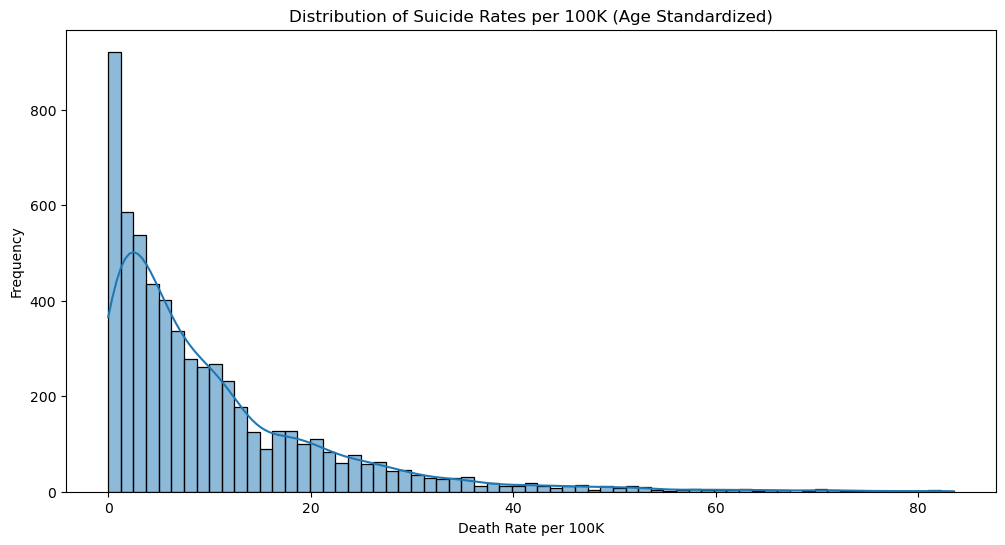

In [16]:
#Distribution of suicide rates
plt.figure(figsize=(12, 6))
sns.histplot(age_std_suicide_rates['DeathRatePer100K'].dropna(), kde=True)
plt.title('Distribution of Suicide Rates per 100K (Age Standardized)')
plt.xlabel('Death Rate per 100K')
plt.ylabel('Frequency')
plt.show()

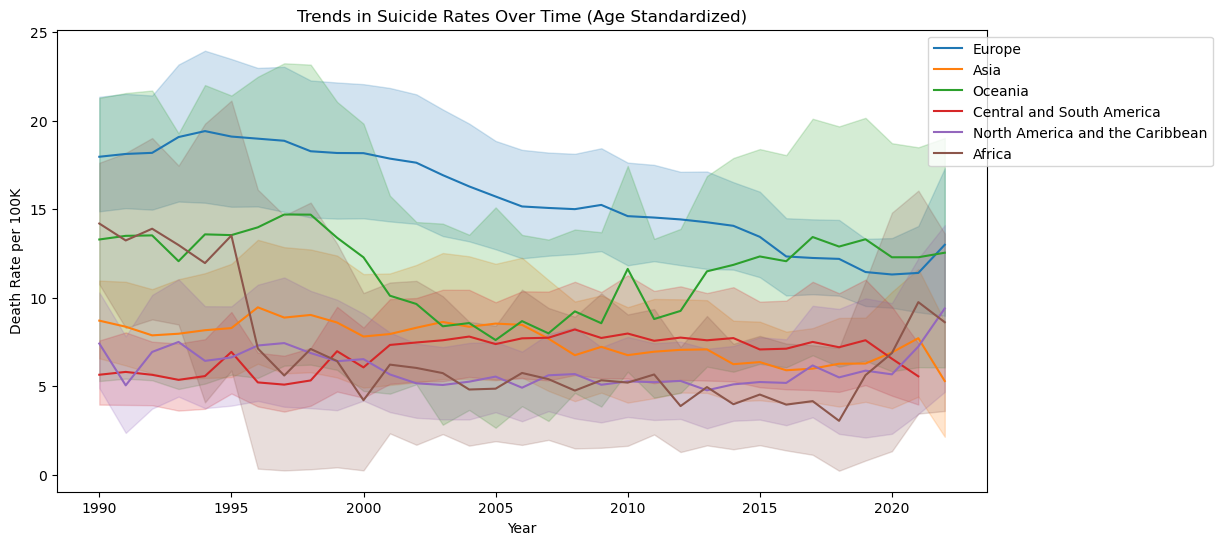

In [17]:
#Trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_std_suicide_rates, x='Year', y='DeathRatePer100K', hue='RegionName')
plt.title('Trends in Suicide Rates Over Time (Age Standardized)')
plt.xlabel('Year')
plt.ylabel('Death Rate per 100K')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

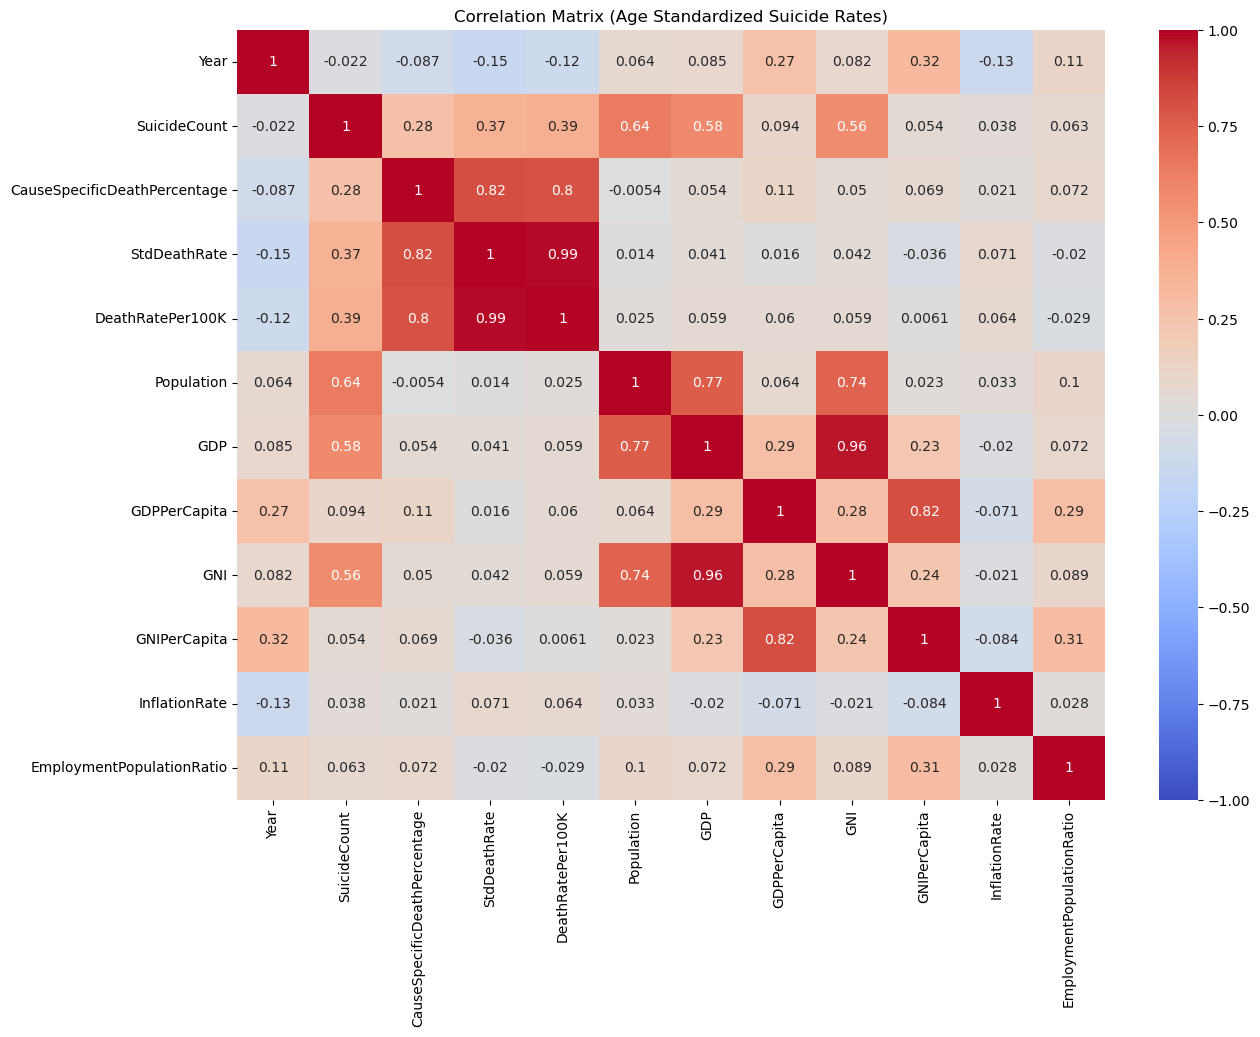

In [18]:
#EDA on 'age_std_suicide_rates' contd: correlation of socioeconomic factors
plt.figure(figsize=(14, 10))
correlation_matrix = age_std_suicide_rates.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Age Standardized Suicide Rates)')
plt.show()

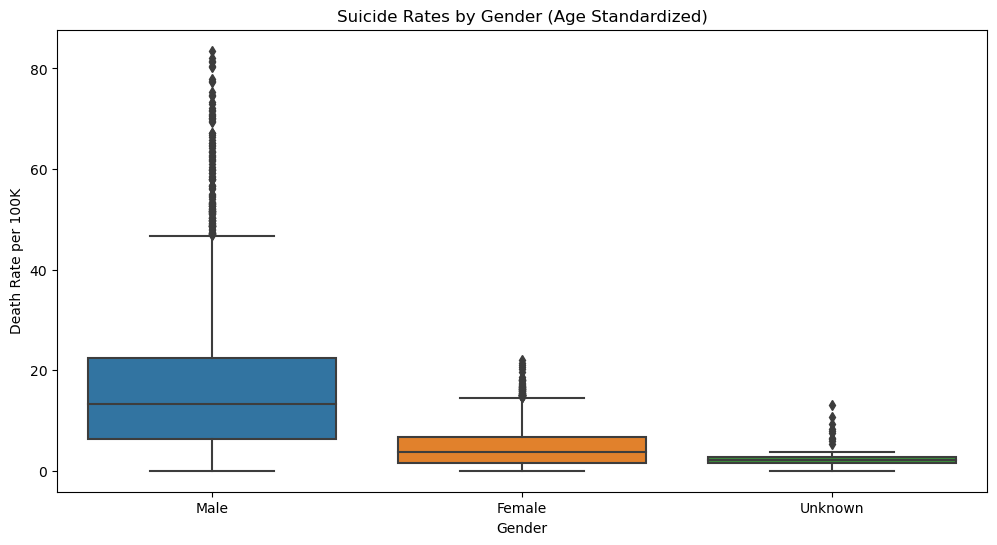

In [20]:
#EDA on 'age_std_suicide_rates' contd: Breakdown by Gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=age_std_suicide_rates, x='Sex', y='DeathRatePer100K')
plt.title('Suicide Rates by Gender (Age Standardized)')
plt.xlabel('Gender')
plt.ylabel('Death Rate per 100K')
plt.show()

In [21]:
#Exploratory Data Analysis on Suicide Rates
print(suicide_rates.describe())

                Year  SuicideCount  CauseSpecificDeathPercentage  \
count  118560.000000  118560.00000                 118560.000000   
mean     2005.740047      63.40000                      3.774074   
std         8.745003     253.62885                      7.351895   
min      1990.000000       0.00000                      0.000000   
25%      1999.000000       0.00000                      0.000000   
50%      2006.000000       4.00000                      0.512445   
75%      2013.000000      32.00000                      4.132231   
max      2022.000000    6787.00000                    100.000000   

       DeathRatePer100K    Population           GDP   GDPPerCapita  \
count     118560.000000  1.185600e+05  1.185600e+05  118560.000000   
mean          12.929155  2.434166e+07  4.883351e+11   17423.508254   
std           22.500223  4.500973e+07  1.601977e+12   18732.564153   
min            0.000000  4.054200e+04  2.197630e+08      60.235121   
25%            0.000000  2.194574e+06

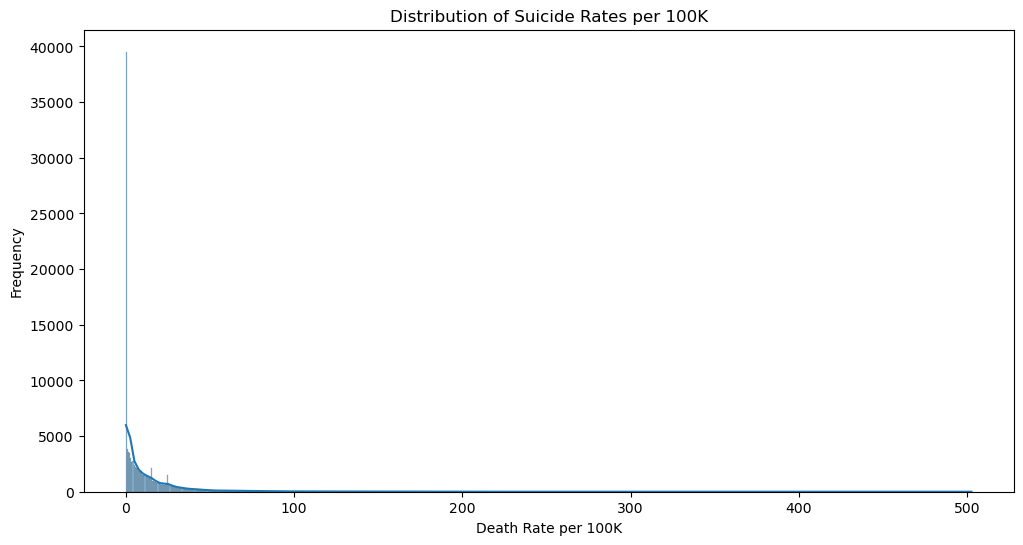

In [22]:
#EDA on suicide_rates: Distribution of suicide rates
plt.figure(figsize=(12, 6))
sns.histplot(suicide_rates['DeathRatePer100K'].dropna(), kde=True)
plt.title('Distribution of Suicide Rates per 100K')
plt.xlabel('Death Rate per 100K')
plt.ylabel('Frequency')
plt.show()

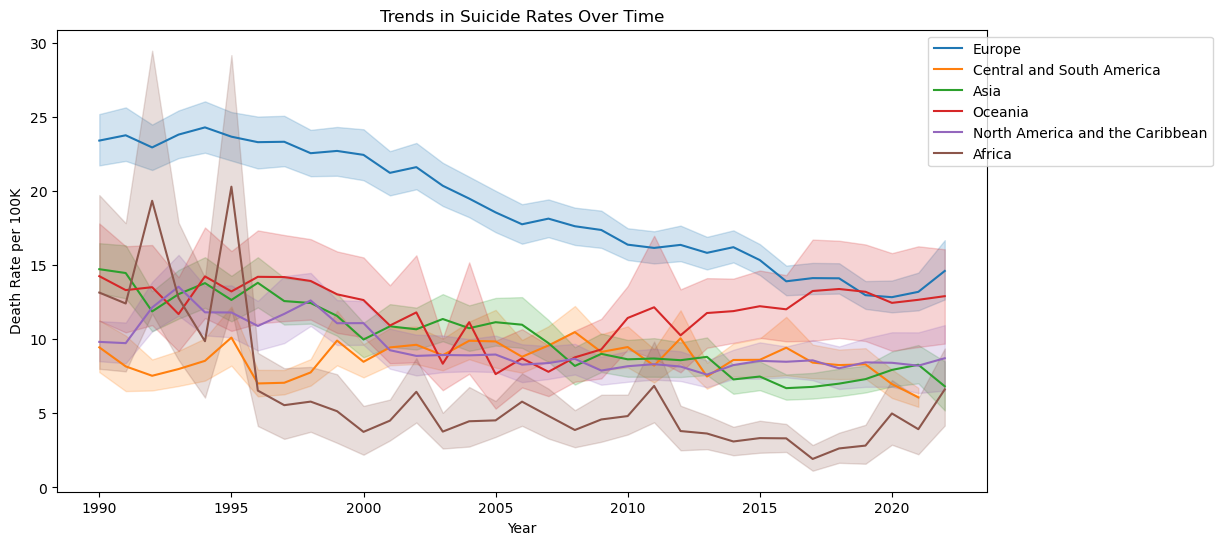

In [23]:
#EDA on suicide_rates: Trends over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=suicide_rates, x='Year', y='DeathRatePer100K', hue='RegionName')
plt.title('Trends in Suicide Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Death Rate per 100K')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

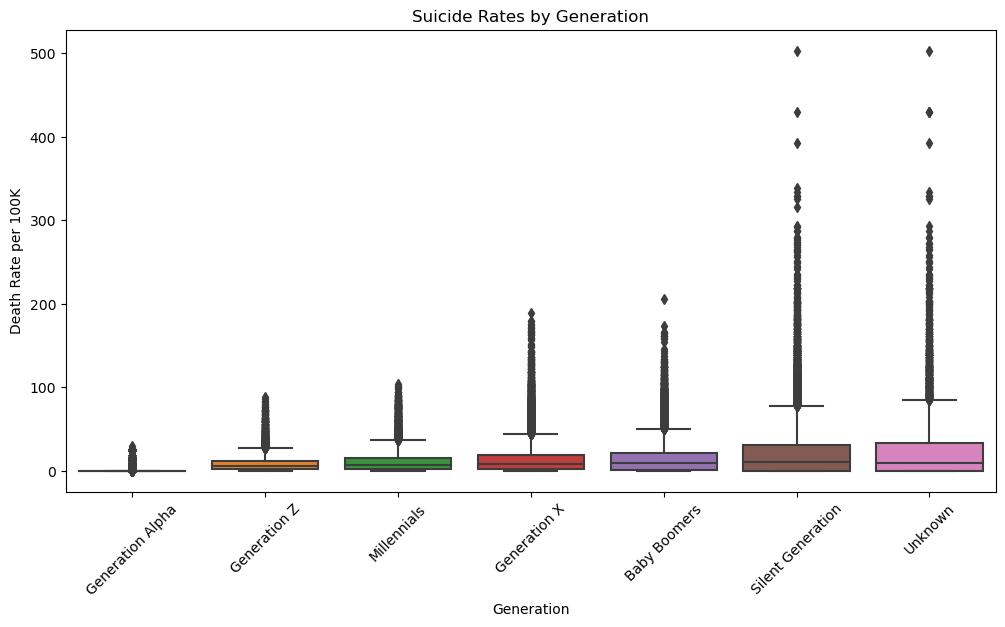

In [24]:
#EDA on suicide_rates: Breakdown by Generation
plt.figure(figsize=(12, 6))
sns.boxplot(data=suicide_rates, x='Generation', y='DeathRatePer100K')
plt.title('Suicide Rates by Generation')
plt.xlabel('Generation')
plt.ylabel('Death Rate per 100K')
plt.xticks(rotation=45)
plt.show()

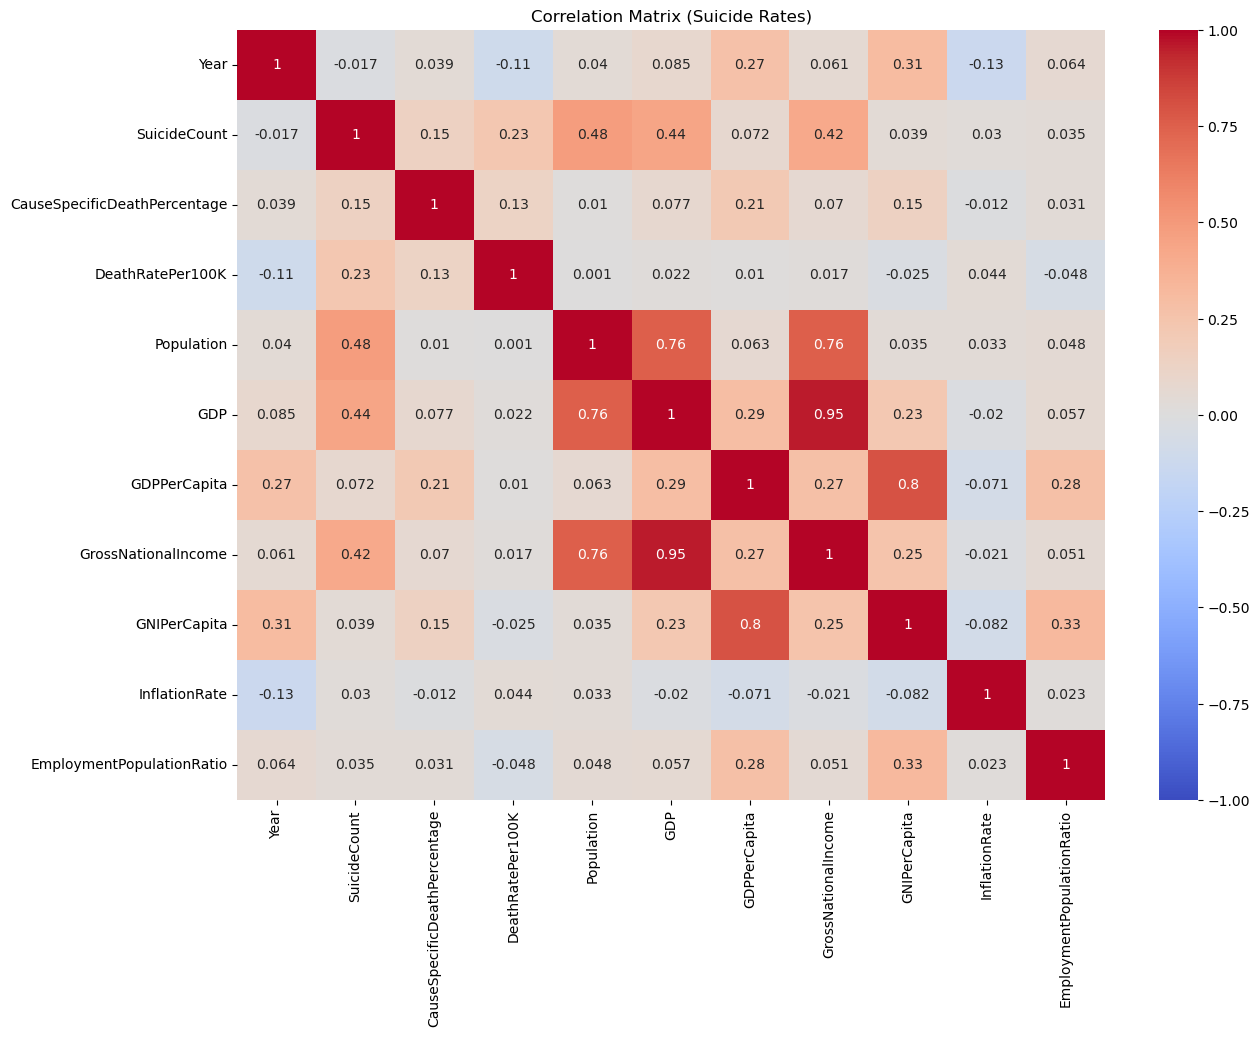

In [25]:
#EDA on suicide_rates: Correlation with socio-economic factors
plt.figure(figsize=(14, 10))
correlation_matrix = suicide_rates.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Suicide Rates)')
plt.show()

In [26]:
# Create lagged features and rolling statistics for 'DeathRatePer100K'
age_std_suicide_rates['Lag1_DeathRatePer100K'] = age_std_suicide_rates['DeathRatePer100K'].shift(1)
age_std_suicide_rates['Lag2_DeathRatePer100K'] = age_std_suicide_rates['DeathRatePer100K'].shift(2)
age_std_suicide_rates['RollingMean_DeathRatePer100K'] = age_std_suicide_rates['DeathRatePer100K'].rolling(window=3).mean()
age_std_suicide_rates['RollingStd_DeathRatePer100K'] = age_std_suicide_rates['DeathRatePer100K'].rolling(window=3).std()

# Drop NA values created by lagging
age_std_suicide_rates.dropna(inplace=True)

# Create interaction features
age_std_suicide_rates['GDP_EmploymentRatio'] = age_std_suicide_rates['GDPPerCapita'] * age_std_suicide_rates['EmploymentPopulationRatio']

# Seasonal features
age_std_suicide_rates['Year'] = pd.to_datetime(age_std_suicide_rates['Year'], format='%Y')
age_std_suicide_rates['Year'] = age_std_suicide_rates['Year'].dt.year

In [27]:
#Splitting the data
from sklearn.model_selection import train_test_split

# Define features and target variable
features = ['GDP', 'GDPPerCapita', 'GNI', 'GNIPerCapita', 'InflationRate', 'EmploymentPopulationRatio', 'Lag1_DeathRatePer100K', 'Lag2_DeathRatePer100K']
target = 'DeathRatePer100K'

# Split the data
X = age_std_suicide_rates[features]
y = age_std_suicide_rates[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#Model selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

In [29]:
#Model Training
# Train Linear Regression model
lr_model.fit(X_train, y_train)

# Train Random Forest model
rf_model.fit(X_train, y_train)

# Train Gradient Boosting model
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [30]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

# Calculate evaluation metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

lr_mse, lr_r2 = evaluate_model(y_test, lr_preds)
rf_mse, rf_r2 = evaluate_model(y_test, rf_preds)
gb_mse, gb_r2 = evaluate_model(y_test, gb_preds)

print(f"Linear Regression - MSE: {lr_mse}, R2: {lr_r2}")
print(f"Random Forest - MSE: {rf_mse}, R2: {rf_r2}")
print(f"Gradient Boosting - MSE: {gb_mse}, R2: {gb_r2}")

Linear Regression - MSE: 49.79784144667489, R2: 0.6104495775877501
Random Forest - MSE: 31.739904541423982, R2: 0.7517102576689738
Gradient Boosting - MSE: 36.81180821236833, R2: 0.7120345978400973


In [31]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform Grid Search
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=3, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_gb_model = gb_grid_search.best_estimator_
print(f"Best parameters for Gradient Boosting: {gb_grid_search.best_params_}")

# Evaluate the best model
best_gb_preds = best_gb_model.predict(X_test)
best_gb_mse, best_gb_r2 = evaluate_model(y_test, best_gb_preds)
print(f"Optimized Gradient Boosting - MSE: {best_gb_mse}, R2: {best_gb_r2}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Optimized Gradient Boosting - MSE: 28.883399078444157, R2: 0.7740556621564005


In [33]:
pip install prophet

   ---------------------------------------- 13.3/13.3 MB 519.4 kB/s eta 0:00:00
   ---------------------------------------- 94.4/94.4 kB 904.6 kB/s eta 0:00:00
   ---------------------------------------- 1.0/1.0 MB 554.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


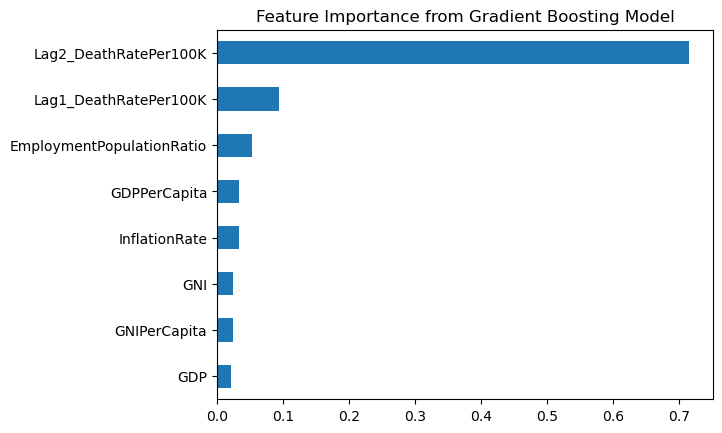

In [34]:
# Feature importance from Gradient Boosting model
feature_importance = pd.Series(best_gb_model.feature_importances_, index=features)
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance from Gradient Boosting Model')
plt.show()

In [36]:
#Additional Validation to enhance Gradient Boost model's robustness
# Split the data again to ensure we have a proper test set
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the best model on the new training set
best_gb_model.fit(X_train, y_train)

# Make predictions on the validation set
val_preds = best_gb_model.predict(X_val)

# Evaluate the model
val_mse = mean_squared_error(y_val, val_preds)
val_r2 = r2_score(y_val, val_preds)

print(f"Out-of-Sample Testing - MSE: {val_mse}, R2: {val_r2}")

# Perform 10-fold cross-validation
cv_scores = cross_val_score(best_gb_model, X, y, cv=10, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_scores = -cv_scores

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

print(f"10-fold Cross-Validation Mean MSE: {cv_mean}")
print(f"10-fold Cross-Validation Standard Deviation of MSE: {cv_std}")

Out-of-Sample Testing - MSE: 28.883399078444157, R2: 0.7740556621564005
10-fold Cross-Validation Mean MSE: 78.79993929258103
10-fold Cross-Validation Standard Deviation of MSE: 52.43123660798882


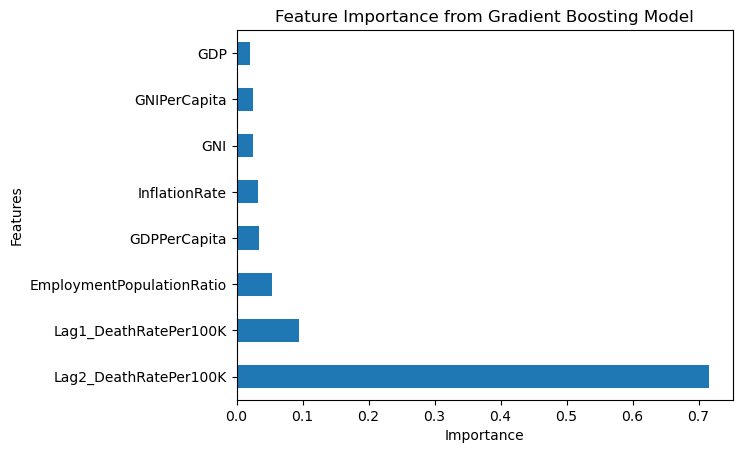

Lag2_DeathRatePer100K        0.715757
Lag1_DeathRatePer100K        0.094109
EmploymentPopulationRatio    0.053102
GDPPerCapita                 0.033836
InflationRate                0.032629
GNI                          0.024965
GNIPerCapita                 0.024523
GDP                          0.021078
dtype: float64


In [37]:
# Feature importance from the optimized Gradient Boosting model
feature_importance = pd.Series(best_gb_model.feature_importances_, index=features)
feature_importance.sort_values(ascending=False).plot(kind='barh')
plt.title('Feature Importance from Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Display the feature importance values
print(feature_importance.sort_values(ascending=False))

In [38]:
# Fraud Detection with Isolation Forest
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.01)
age_std_suicide_rates['anomaly'] = isolation_forest.fit_predict(age_std_suicide_rates[features])

anomalies = age_std_suicide_rates[age_std_suicide_rates['anomaly'] == -1]
print(anomalies)

     RegionCode                       RegionName CountryCode  \
317          AS                             Asia         AZE   
318          AS                             Asia         AZE   
586          EU                           Europe         BLR   
3799         EU                           Europe         LTU   
3801         EU                           Europe         LTU   
4151         AS                             Asia         QAT   
4152         AS                             Asia         QAT   
4157         AS                             Asia         QAT   
4159         AS                             Asia         QAT   
4160         AS                             Asia         QAT   
4161         AS                             Asia         QAT   
4162         AS                             Asia         QAT   
4163         AS                             Asia         QAT   
4164         AS                             Asia         QAT   
4165         AS                         

              Year  SuicideCount  CauseSpecificDeathPercentage  StdDeathRate  \
count    60.000000     60.000000                     60.000000     60.000000   
mean   2008.500000  13011.033333                      1.476769      9.985696   
std       8.528119  13252.223492                      0.989145      9.626984   
min    1991.000000      1.000000                      0.080172      0.110988   
25%    2004.750000    334.750000                      0.607699      3.840440   
50%    2010.500000   8667.500000                      0.954751      5.543503   
75%    2014.000000  26549.000000                      2.454731     17.245242   
max    2021.000000  38358.000000                      3.925504     51.303844   

       DeathRatePer100K    Population           GDP  GDPPerCapita  \
count         60.000000  6.000000e+01  6.000000e+01     60.000000   
mean          11.013766  2.087017e+08  1.083438e+13  51607.419063   
std           10.379999  1.439600e+08  8.360644e+12  27044.566503   
min

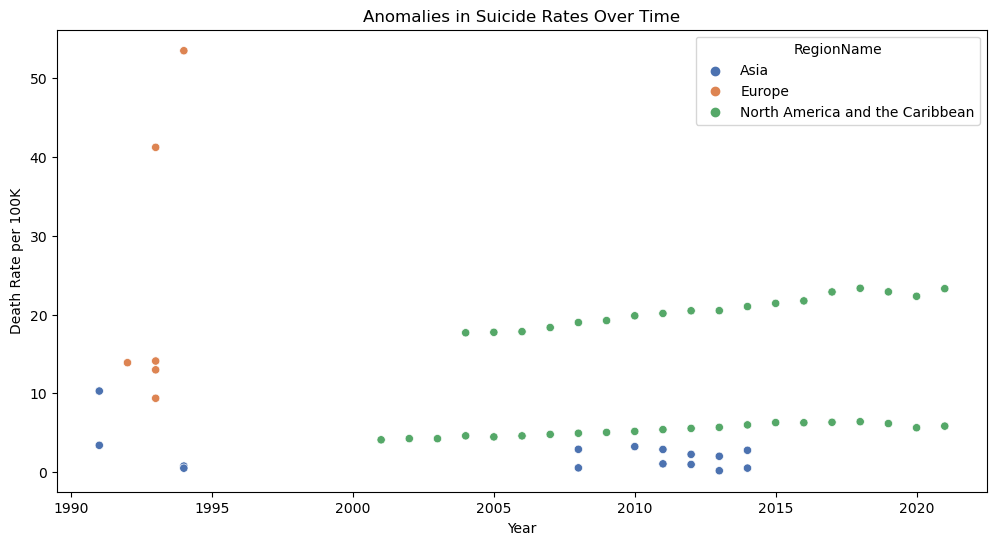

Unique values in RegionCode: ['AS' 'EU' 'NAC']
Unique values in RegionName: ['Asia' 'Europe' 'North America and the Caribbean']
Unique values in CountryCode: ['AZE' 'BLR' 'LTU' 'QAT' 'RUS' 'UKR' 'USA' 'UZB']
Unique values in CountryName: ['Azerbaijan' 'Belarus' 'Lithuania' 'Qatar' 'Russian Federation' 'Ukraine'
 'United States of America' 'Uzbekistan']
Unique values in Year: [1994 1992 1993 2008 2010 2011 2012 2013 2014 2001 2002 2003 2004 2005
 2006 2007 2009 2015 2016 2017 2018 2019 2020 2021 1991]
Unique values in Sex: ['Male' 'Female']
Unique values in SuicideCount: [   28    19  2582   271   274    31     2    46    45     5    38    36
     1    52     3 10120  9932  2609  5950  6246  6281 25566  6873 25907
  6730 26308  6992 27272  7330 28450  7585 29091  7821 30281  8088 31003
  8515 31780  8820 32055  9094 33113  9660 33994 10199 34727 10238 36782
 10391 37761 10583 37256 10255 36551  9428 38358  9825  1049   355]
Unique values in CauseSpecificDeathPercentage: [0.08968035 0.08

In [39]:
#detailed analysis of anomalies
# Summary statistics of anomalies
print(anomalies.describe())

# Visualize the anomalies to identify any patterns or trends
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='DeathRatePer100K', data=anomalies, hue='RegionName', palette='deep')
plt.title('Anomalies in Suicide Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Death Rate per 100K')
plt.show()

# Check specific columns for unusual values
for column in anomalies.columns:
    print(f"Unique values in {column}: {anomalies[column].unique()}")